In [1]:
#packages and oAuth
require(twitteR)
#install.packages("dismo",repos='http://cran.us.r-project.org')
#require(RCurl)
require(XML)
library(ggmap)
library(RCurl)
library(RJSONIO)
library(plyr)


con_k<- 'I0z7AKEkEgo2g1DCsRrG6UR9t'
con_s<- 'KUHwwrOxbGU74MlayHJyUdttCWqlbTgWLx9XMxuGowhMYZb8Se'
acc_tok<- '399497071-qEpvCQC3OxJxflExP8NNGfmqYcLxvrfBFNPHTw4R'
acc_s<-'lHSwVVvytEO87w4i2QsaOjiAkKHudRPRJ8tZ84V3Gywen'

setup_twitter_oauth(con_k,con_s,acc_tok,acc_s)

Loading required package: twitteR
Loading required package: XML
Loading required package: ggplot2
Loading required package: bitops

Attaching package: 'plyr'

The following object is masked from 'package:twitteR':

    id



[1] "Using direct authentication"


In [11]:
#user input
search <- '#12 #superbowl'
tweet_count <- 3200


In [12]:
tweets <- searchTwitter(search, n=tweet_count, since='2017-02-01', lang="en")
stripped_tweets <- strip_retweets(tweets, strip_manual=TRUE, strip_mt=TRUE)
stf <- twListToDF(stripped_tweets)
result <- data.frame(stf$screenName)
x = list()

#get user location for each user
for (i in result[[1]]){
    ps <- getUser(i)$location
    x[i] <- ps
}
na.omit(x)

#write to file
write.table(cbind(x), file="places.csv",append=TRUE, row.names=FALSE, col.names=FALSE, na="")


Warning message in doRppAPICall("search/tweets", n, params = params, retryOnRateLimit = retryOnRateLimit, :
"3200 tweets were requested but the API can only return 289"

$Myong_Wisley
[1] "Burbank, California"

$MindOfMo
[1] "Roaming, Stateside"

$mx1global
[1] ""

$The_LadyJStyle
[1] "NYC and London"

$Swiggy_12
[1] "Toronto"

$StrayBeard
[1] "Here"

$LaurenPincusRD
[1] "Metro NY area/ NJ"

$BIGDREW_
[1] ""

$RepHalTuring
[1] "DC & NH-3"

$cheddar
[1] "New York, NY"

$RichEisenShow
[1] "Los Angeles"

$eterry28
[1] "Missouri, USA"

$Do512
[1] "Austin"

$GoTeamMV19
[1] "California, USA"

$zesty_nfl
[1] "Boston, MA"

$IraPickett
[1] "Tampa, FL"

$openomroep
[1] "europa"

$opennViral
[1] "europe"

$IAmJLuvDaPrince
[1] "Cuero, Texas"

$`1059SUNNYFM`
[1] "Orlando"

$joshuatomey
[1] "Miami FL | Boston MA"

$zesty_steelers
[1] "Pittsburgh, PA"

$F3CousinIT
[1] "Winterville, NC"

$perRFTM
[1] "North Carolina, USA"

$zesty_ny_giants
[1] "New York, NY"

$WillieMcaRep
[1] "Memphis,Tn"

$ThrpStr
[1] "San Antonio"

$liamthompson1
[1] "Adelaide"

$`4thandtwenty420`
[1] "Hartford, CT"

$TheSammer88
[1] ""

$PoliticusSports
[1] "USA"

$zesty_patriots
[1] "Boston, MA"

$kianamartenique
[1] "Virginia Beach, Virginia "

$WestrnFreePress
[1] "Arizona "

$FansFantasy
[1] "Baltimore"

$gdnnetwork
[1] ""

$PartyGirlDiet
[1] "San Francisco, CA & Hawaii"

$joefav
[1] "Bergen County, New Jersey"

$onthecommonorg
[1] "Earth (Foxborough, MA 02035)"

$TemplePRSSA
[1] "Philadelphia, Pa"

$cknoblock17
[1] "New Britain, CT"

$BGlobeSports
[1] "Boston"

$mattpep15
[1] "Boston"

$TFMkts
[1] ""

$HollyHavocJTV
[1] "Hell"

$TFlynn457
[1] "Buffalo, NY"

$theryanmichael
[1] "United States"

$DanielJeffreyS
[1] "Philadelphia, Pennsylvania"

$EricFalquero
[1] "DC | roots: tinyurl.com/qietWV"

$SpadoraOnSports
[1] "New York"

$`02035org`
[1] "Foxborough, Massachusetts, USA"

$HighConfidence
[1] ""

$CarnavalInsider
[1] "Bahia Carnival Feb 22-28-2017"

$PattiGreene13
[1] "Bible Study and Prayer! Amen!"

$e6s4life
[1] "Texas, USA"

$GirlTakesCape
[1] ""

$MetrowestMamas
[1] "Metrowest, Massachusetts"

$jeffhasen
[1] ""

$ModernWallSt
[1] "Wall Street, New York"

$McKeen72
[1] ""

$welovesports247
[1] ""

$KevinDonPorter
[1] "Washington, DC"

$ChrisFultz5
[1] "United States"

$SPB_Design
[1] "UK"

$BrianDunn1
[1] "Plymouth, MA"

$BigandTallSport
[1] "Toronto, Ontario"

$jmells76
[1] ""

$GutseyLife
[1] "Boston, MA"

$AhhYeahKyleYeah
[1] "London"

$NFLFilms
[1] "New Jersey"

$E_Hard
[1] "West Hartford CT"

$weightsandbbq
[1] ""

$PoBoyProphet
[1] "Live from the center of the Earth "

Map from URL : http://maps.googleapis.com/maps/api/staticmap?center=33.496,-93.4935&zoom=3&size=640x640&scale=2&maptype=roadmap&language=en-EN&sensor=false


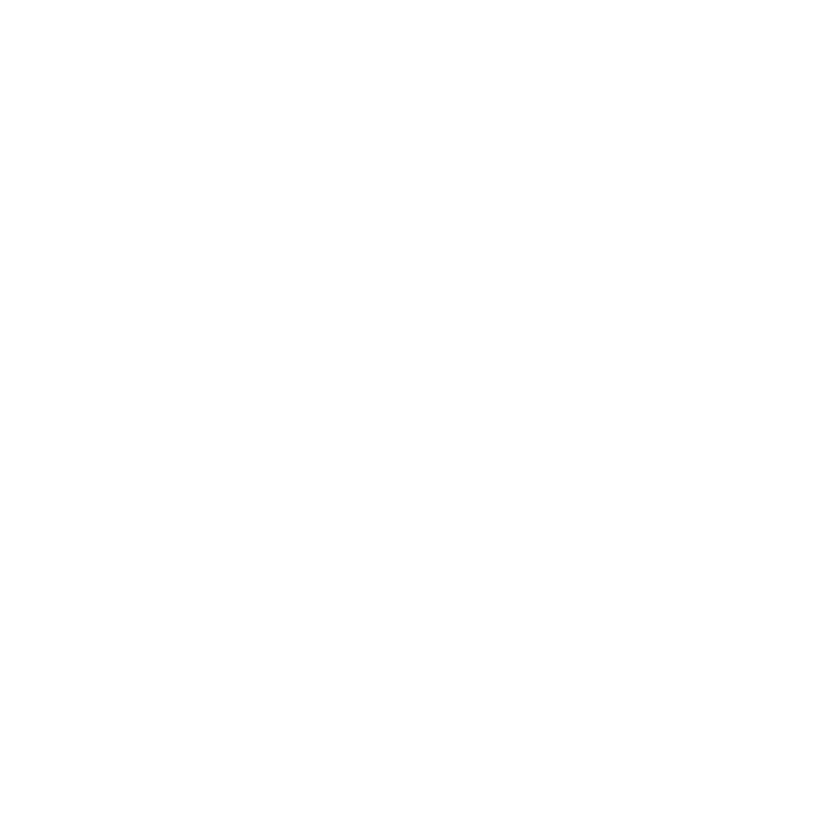

In [14]:
ext_lon <- c(-124.626, -62.361) #extreme coordinates for USA longitude
ext_lat <- c(18.005, 48.987)   #extreme coordinates for USA latitude

url <- function(address, return.call = "json", sensor = "false") {
  root <- "http://maps.google.com/maps/api/geocode/"
  u <- paste(root, return.call, "?address=", address, "&sensor=", sensor, sep = "")
  return(URLencode(u))
}
geoCode <- function(address,verbose=FALSE) {
  if(verbose) cat(address,"\n")
  u <- url(address)
  doc <- getURL(u)
  x <- fromJSON(doc,simplify = FALSE)
  if(x$status=="OK") {
    lat_val <- x$results[[1]]$geometry$location$lat
    lng_val <- x$results[[1]]$geometry$location$lng
    location_type  <- x$results[[1]]$geometry$location_type
    formatted_address  <- x$results[[1]]$formatted_address
    return(c(lat_val, lng_val, location_type, formatted_address))
    Sys.sleep(0.5)
  } else {
    return(c(NA,NA,NA, NA))
  }
}
    
fout=read.csv("places.csv", row.names=NULL)
address <- c(fout)
coordinates  <- ldply(address[[1]], function(x) geoCode(x))
coordinates <- na.omit(coordinates)
names(coordinates)  <- c("lon","lat","location_type", "formatted") 
lon_val<-c(as.numeric(unlist(coordinates[2])))
lat_val<-c(as.numeric(unlist(coordinates[1])))
df <- as.data.frame(cbind(lon_val,lat_val))


pam <- get_map(location = c(lon = mean(ext_lon), lat = mean(ext_lat)), zoom = 3,
                      maptype = "roadmap", scale = 2)

# plotting the map with some points on it
ggmap(pam) +
  geom_point(data = df, aes(x = lon_val, y = lat_val, fill = "red", alpha = 0.8), size = 2, shape = 21) +
  guides(fill=FALSE, alpha=FALSE, size=FALSE)    